In [1]:
import numpy as np
import pandas as pd
import sys, os, time
main_folder = './../'
if main_folder not in sys.path:
    sys.path.append(main_folder)
from evolution import DifferentialEvolution
from glob       import glob
from tqdm       import tqdm

import dirs
from utils      import get_solution, ProgressBar, write_log
import matplotlib.pyplot as plt 

progbar = ProgressBar(elapsed_time=True)

### Parameters

In [2]:
# Competition Parameters
funcId      = 1
dim         = 10
numRuns     = 2
targetError = 1e-8

# Algorithm Parameters
pop_size = 300
percMaxEvals = 1
maxEvals = 'auto'
maxGenerations = None
fitness_clusters = None
crossover = 'binonial'
mutation = 'best'
n_diff = 1
lambda_mutation = .5
opposition = False
input_data_filepath = './../input_data'
active = False

In [3]:
# Parameters
algorithm = "de"
mutation = "best"
n_diff = 1
crossover = "bin"
funcId = 7
dim = 10
numRuns = 51
pop_size = 300
percMaxEvals = 0.4
lambda_mutation = 0.5
opposition = False
fitness_clusters = None
input_data_filepath = "./input_data"
active = True


In [4]:
maxEvals = maxEvals if percMaxEvals is None else percMaxEvals*10000*dim
run_tag = '[' + '_'.join([str(funcId), 
                          str(dim), 
                          str(numRuns),
                          str(pop_size), 
                          str(percMaxEvals),                                                     
                          '{}'.format(lambda_mutation), 
                          str(opposition),
                          str(fitness_clusters)
                         ])  + ']'
run_tag

'[7_10_51_300_0.4_0.5_False_None]'

In [5]:
alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)

output_filepath = os.path.join(dirs.results, str(alg))
if not os.path.exists(output_filepath):
    os.makedirs(output_filepath)
output_filepath = output_filepath + '/' + run_tag

print ('Writing log at ', output_filepath + 'log.tsv')
write_log(filepath=output_filepath + 'log.tsv', 
          mode="w+", 
          text='[{}]\trun\telapsedTime\tsuccessRate\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime())))  

Writing log at 

./results/DE/best/1/bin/[7_10_51_300_0.4_0.5_False_None]log.tsv

In [6]:
hist = pd.DataFrame()
arr_runs = range(numRuns)
solution = get_solution(funcId, dim, input_data_filepath=input_data_filepath)
successRate = 0
for idx_run in arr_runs:
    progbar.update_progress(idx_run/float(len(arr_runs)))
    
    # Differential Evolution
    alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)
    
    errorHist, fitnessHist = alg.optimize(target=solution, max_f_evals=maxEvals, target_error=targetError, verbose=True)        
    bestError = errorHist.iloc[-1,:].min()
    errorHist["run"] = np.ones(errorHist.shape[0], dtype=int)*idx_run
    hist = pd.concat([hist, errorHist], ignore_index=False)    
    if bestError <= targetError:
        print ("Target error achieved with error {}".format(bestError))
        successRate += 1
    
    write_log(filepath=output_filepath + 'log.tsv', 
              text='[{}]\t{}/{}\t{}\t{}\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime()), 
                                              idx_run+1,
                                              len(arr_runs),
                                              progbar.get_elapsed_time(),
                                              successRate)
             )
    
hist.index.name = 'generation'
hist.to_csv(output_filepath + 'hist.tsv', sep='\t')
progbar.update_progress(1)

[0:00:00][----------] 0.00% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	701.0386

Best Fitness:	700.3833
Solution:	700.0000
Diff:		0.3833

[0:05:08][----------] 1.96% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	701.0799

Best Fitness:	700.6646
Solution:	700.0000
Diff:		0.6646

[0:09:44][----------] 3.92% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	701.1189

Best Fitness:	700.8937
Solution:	700.0000
Diff:		0.8937

[0:14:13][#---------] 5.88% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	701.1484

Best Fitness:	700.9237
Solution:	700.0000
Diff:		0.9237

[0:18:49][#---------] 7.84% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	701.0593

Best Fitness:	700.6123
Solution:	700.0000
Diff:		0.6123

[0:23:25][#---------] 9.80% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	701.1207

Best Fitness:	700.8250
Solution:	700.0000
Diff:		0.8250

[0:28:15][#---------] 11.76% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	701.0578

Best Fitness:	700.7232
Solution:	700.0000
Diff:		0.7232

[0:33:04][#---------] 13.73% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	701.0620

Best Fitness:	700.5736
Solution:	700.0000
Diff:		0.5736

[0:37:46][##--------] 15.69% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	701.0733

Best Fitness:	700.7817
Solution:	700.0000
Diff:		0.7817

[0:41:48][##--------] 17.65% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	701.1367

Best Fitness:	700.8069
Solution:	700.0000
Diff:		0.8069

[0:45:40][##--------] 19.61% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	701.1733

Best Fitness:	700.7626
Solution:	700.0000
Diff:		0.7626

[0:49:40][##--------] 21.57% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	701.0204

Best Fitness:	700.7334
Solution:	700.0000
Diff:		0.7334

[0:53:40][##--------] 23.53% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	701.0891

Best Fitness:	700.5650
Solution:	700.0000
Diff:		0.5650

[0:57:41][###-------] 25.49% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	701.0882

Best Fitness:	700.6986
Solution:	700.0000
Diff:		0.6986

[1:01:29][###-------] 27.45% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	701.0896

Best Fitness:	700.7762
Solution:	700.0000
Diff:		0.7762

[1:05:26][###-------] 29.41% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	701.0233

Best Fitness:	700.4972
Solution:	700.0000
Diff:		0.4972

[1:09:24][###-------] 31.37% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	701.1110

Best Fitness:	700.7881
Solution:	700.0000
Diff:		0.7881

[1:13:19][###-------] 33.33% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	701.1044

Best Fitness:	700.6466
Solution:	700.0000
Diff:		0.6466

[1:16:58][####------] 35.29% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	701.0125

Best Fitness:	700.7383
Solution:	700.0000
Diff:		0.7383

[1:21:06][####------] 37.25% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	701.0866

Best Fitness:	700.8552
Solution:	700.0000
Diff:		0.8552

[1:25:09][####------] 39.22% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	701.0649

Best Fitness:	700.7796
Solution:	700.0000
Diff:		0.7796

[1:29:04][####------] 41.18% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	701.0315

Best Fitness:	700.7038
Solution:	700.0000
Diff:		0.7038

[1:32:52][####------] 43.14% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	701.0945

Best Fitness:	700.7998
Solution:	700.0000
Diff:		0.7998

[1:36:19][#####-----] 45.10% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	701.0835

Best Fitness:	700.6682
Solution:	700.0000
Diff:		0.6682

[1:39:51][#####-----] 47.06% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	701.1134

Best Fitness:	700.7693
Solution:	700.0000
Diff:		0.7693

[1:43:08][#####-----] 49.02% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	701.1006

Best Fitness:	700.6850
Solution:	700.0000
Diff:		0.6850

[1:46:39][#####-----] 50.98% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	701.0325

Best Fitness:	700.7605
Solution:	700.0000
Diff:		0.7605

[1:50:02][#####-----] 52.94% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	701.0332

Best Fitness:	700.7447
Solution:	700.0000
Diff:		0.7447

[1:53:17][#####-----] 54.90% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	701.0732

Best Fitness:	700.7601
Solution:	700.0000
Diff:		0.7601

[1:56:47][######----] 56.86% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	701.1223

Best Fitness:	700.7441
Solution:	700.0000
Diff:		0.7441

[2:00:05][######----] 58.82% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	701.0522

Best Fitness:	700.6960
Solution:	700.0000
Diff:		0.6960

[2:03:25][######----] 60.78% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	701.0656

Best Fitness:	700.6965
Solution:	700.0000
Diff:		0.6965

[2:06:44][######----] 62.75% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	701.0642

Best Fitness:	700.6977
Solution:	700.0000
Diff:		0.6977

[2:10:07][######----] 64.71% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	701.0769

Best Fitness:	700.8392
Solution:	700.0000
Diff:		0.8392

[2:13:43][#######---] 66.67% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	701.1161

Best Fitness:	700.8831
Solution:	700.0000
Diff:		0.8831

[2:17:15][#######---] 68.63% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	701.0438

Best Fitness:	700.4472
Solution:	700.0000
Diff:		0.4472

[2:20:27][#######---] 70.59% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	701.0575

Best Fitness:	700.7203
Solution:	700.0000
Diff:		0.7203

[2:23:37][#######---] 72.55% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	701.0630

Best Fitness:	700.6487
Solution:	700.0000
Diff:		0.6487

[2:26:37][#######---] 74.51% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	701.1048

Best Fitness:	700.8192
Solution:	700.0000
Diff:		0.8192

[2:29:31][########--] 76.47% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	701.0560

Best Fitness:	700.6984
Solution:	700.0000
Diff:		0.6984

[2:32:36][########--] 78.43% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	701.0362

Best Fitness:	700.7420
Solution:	700.0000
Diff:		0.7420

[2:35:32][########--] 80.39% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	701.0293

Best Fitness:	700.6988
Solution:	700.0000
Diff:		0.6988

[2:38:33][########--] 82.35% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	701.0712

Best Fitness:	700.6909
Solution:	700.0000
Diff:		0.6909

[2:41:26][########--] 84.31% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	701.2069

Best Fitness:	700.8255
Solution:	700.0000
Diff:		0.8255

[2:44:25][#########-] 86.27% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	701.0219

Best Fitness:	700.7030
Solution:	700.0000
Diff:		0.7030

[2:47:16][#########-] 88.24% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	701.1284

Best Fitness:	700.6789
Solution:	700.0000
Diff:		0.6789

[2:50:21][#########-] 90.20% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	701.0510

Best Fitness:	700.7567
Solution:	700.0000
Diff:		0.7567

[2:53:16][#########-] 92.16% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	701.1852

Best Fitness:	700.8698
Solution:	700.0000
Diff:		0.8698

[2:56:28][#########-] 94.12% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	701.0259

Best Fitness:	700.8165
Solution:	700.0000
Diff:		0.8165

[2:59:14][##########] 96.08% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	701.0489

Best Fitness:	700.6000
Solution:	700.0000
Diff:		0.6000

[3:02:09][##########] 98.04% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	701.0822

Best Fitness:	700.7194
Solution:	700.0000
Diff:		0.7194

[3:05:20][##########] 100.00% Done...


In [7]:
print ("Elapsed Time: ", progbar.get_elapsed_time())

Elapsed Time: 

3:05:20

In [8]:
errorHist.tail()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,run
generation,,,,,,,,,,,,,,,,,,,,,
126,1.122397,1.122048,1.067983,1.104695,1.100868,1.141241,1.091652,0.998953,1.115389,1.07619,...,1.111733,1.087911,1.108338,1.136279,1.006639,0.863416,1.118807,1.13865,1.133739,50
127,1.122397,1.122048,1.067983,1.104695,1.100868,1.141241,1.091652,0.998953,1.115389,1.07619,...,1.111733,1.087911,1.108338,1.136279,1.006639,0.863416,1.118807,1.13865,1.133739,50
128,1.122397,1.122048,1.067983,1.104695,1.100868,1.141241,1.091652,0.998953,1.115389,1.07619,...,1.111733,1.087911,1.108338,1.136279,1.006639,0.863416,1.118807,1.13865,1.133739,50
129,1.122397,1.122048,1.067983,1.104695,1.100868,1.141241,1.091652,0.998953,1.088436,1.07619,...,1.111733,1.087911,1.108338,1.136279,1.006639,0.863416,1.118807,1.13865,1.067033,50
130,1.122397,1.122048,1.067983,1.104695,1.100868,1.141241,1.091652,0.998953,1.088436,1.07619,...,1.111733,1.087911,1.108338,1.136279,1.006639,0.863416,1.118807,1.13865,1.067033,50


In [9]:
arr_error = list()
arr_best_error = list()
for run in hist['run'].unique():
    df_run = hist[hist['run'] == run].drop(['run'], axis=1) 
    bestError = df_run.iloc[-1,:].min()    
    arr_best_error.append(bestError)    
    print ('Best error for run {}: {}'.format(run, bestError))
    arr_error.append(np.array(df_run.min(axis=1)))    
arr_error = np.array(arr_error)
# arr_error

Best error for run 0: 0.38326926365868985

Best error for run 1: 0.6645954369291758

Best error for run 2: 0.8936537757119822

Best error for run 3: 0.9236927053293584

Best error for run 4: 0.6123240787205759

Best error for run 5: 0.825043731930009

Best error for run 6: 0.7231737050540232

Best error for run 7: 0.5735584345752613

Best error for run 8: 0.7816938622244152

Best error for run 9: 0.8069031294461411

Best error for run 10: 0.7626272072020583

Best error for run 11: 0.7334084669084859

Best error for run 12: 0.5650043396152569

Best error for run 13: 0.6986220406031407

Best error for run 14: 0.776202342875763

Best error for run 15: 0.4971651313168195

Best error for run 16: 0.788078511774188

Best error for run 17: 0.6466348641931745

Best error for run 18: 0.7383008084021867

Best error for run 19: 0.8551829317370903

Best error for run 20: 0.7796269907667011

Best error for run 21: 0.7037966604742678

Best error for run 22: 0.7998167012415252

Best error for run 23: 0.6682351376214228

Best error for run 24: 0.7693146414464991

Best error for run 25: 0.6849765350845018

Best error for run 26: 0.7604923481036394

Best error for run 27: 0.7447190610848793

Best error for run 28: 0.7600515733673774

Best error for run 29: 0.7440606003955281

Best error for run 30: 0.6960431893728583

Best error for run 31: 0.6965230148134651

Best error for run 32: 0.6977275147745559

Best error for run 33: 0.8391850256602993

Best error for run 34: 0.8830919230173322

Best error for run 35: 0.4472195081402788

Best error for run 36: 0.7202754024398246

Best error for run 37: 0.648700518798023

Best error for run 38: 0.8191918147764454

Best error for run 39: 0.6984272502512567

Best error for run 40: 0.7419508025753885

Best error for run 41: 0.6987511720199109

Best error for run 42: 0.6908677151948268

Best error for run 43: 0.8255182147062214

Best error for run 44: 0.7029781136396878

Best error for run 45: 0.6788825115492045

Best error for run 46: 0.756652790359226

Best error for run 47: 0.8698459813242607

Best error for run 48: 0.8165016265536451

Best error for run 49: 0.6000135271423233

Best error for run 50: 0.719396022849196

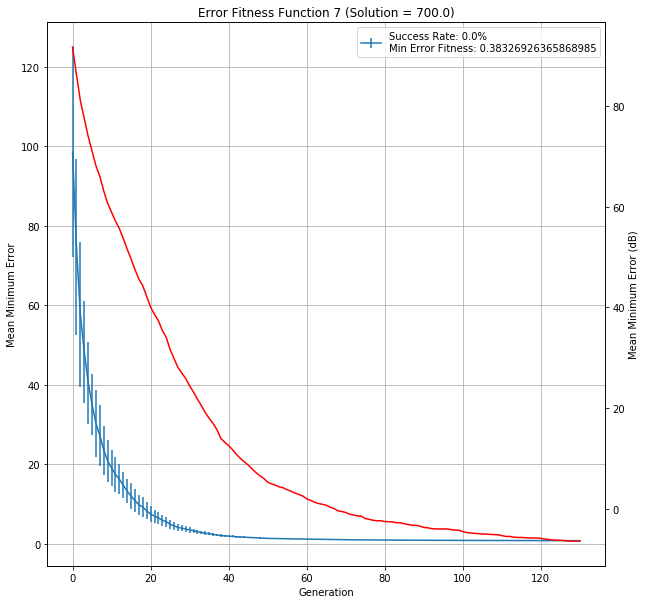

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
label = 'Success Rate: {}%\nMin Error Fitness: {}'.format(100*(successRate/float(numRuns)), arr_error.min())
ax.errorbar(np.arange(alg.generations), arr_error.mean(axis=0), yerr=arr_error.std(axis=0), label=label)
ax2 = ax.twinx()
ax2.plot(np.arange(alg.generations), 20*np.log(arr_error.mean(axis=0)), label='Mean Min Error (dB)', color='red')
ax2.set_ylabel('Mean Minimum Error (dB)')

ax.grid(True)
ax.set_ylabel('Mean Minimum Error')
ax.legend()
ax.set_xlabel('Generation')
ax.set_title('Error Fitness Function {} (Solution = {})'.format(funcId, solution))
plt.savefig(output_filepath + 'mean_error_evolution.jpeg', bbox_inches = 'tight')

In [11]:
df_sumup = pd.DataFrame(columns=['algorithm', '#Fc', 'D', 'percFES'] + ['run_' + str(i) for i in np.arange(1,numRuns+1,1)] + ['mean', 'elapsed_time', 'evals'])
df_sumup.loc[df_sumup.shape[0]] = [str(alg), funcId, dim, percMaxEvals] + arr_best_error + [np.mean(arr_best_error), progbar.get_elapsed_time(), alg.fitnessEvals]
print ('Saving df_sumup to ', output_filepath + 'df_sumup.tsv')
df_sumup.to_csv(output_filepath + 'df_sumup.tsv', sep='\t')
df_sumup

Saving df_sumup to 

./results/DE/best/1/bin/[7_10_51_300_0.4_0.5_False_None]df_sumup.tsv

,algorithm,#Fc,D,percFES,run_1,run_2,run_3,run_4,run_5,run_6,...,run_45,run_46,run_47,run_48,run_49,run_50,run_51,mean,elapsed_time,evals
0,DE/best/1/bin,7,10,0.4,0.383269,0.664595,0.893654,0.923693,0.612324,0.825044,...,0.702978,0.678883,0.756653,0.869846,0.816502,0.600014,0.719396,0.723764,3:05:20,39900
